In [1]:
#Step 1: Initial Imports
# Importing necessary libraries for data manipulationa and analysis.
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
# Defining the list of stock tickers for Nvidia, Apple, Amazon and Tesla.
tickers = ['NVDA', 'AAPL', 'AMZN', 'TSLA']


In [3]:
# Fetch data for each ticker and calculate daily returns
data = {} #This is the dictionary to store historical data for reach ticker.
returns = {} #This dictionoary is used to store daily returns for eack ticker.

for ticker in tickers:
    stock = yf.Ticker(ticker)
    hist = stock.history(period="1y")
    data[ticker] = hist
    data[ticker]['Daily Return'] = data[ticker]['Close'].pct_change()

In [4]:
# Display data for Nvidia and other companies for brief insight on the past year's performance.
print(data['NVDA'].head())

                                Open       High        Low      Close  \
Date                                                                    
2023-07-19 00:00:00-04:00  47.449793  47.803687  46.728009  47.062908   
2023-07-20 00:00:00-04:00  46.493078  47.072907  45.048511  45.506374   
2023-07-21 00:00:00-04:00  45.774292  45.852271  44.086797  44.295734   
2023-07-24 00:00:00-04:00  44.717608  45.095497  44.026817  44.598644   
2023-07-25 00:00:00-04:00  44.927551  46.169176  44.909555  45.665329   

                              Volume  Dividends  Stock Splits  Daily Return  
Date                                                                         
2023-07-19 00:00:00-04:00  427502000        0.0           0.0           NaN  
2023-07-20 00:00:00-04:00  537865000        0.0           0.0     -0.033073  
2023-07-21 00:00:00-04:00  963769000        0.0           0.0     -0.026604  
2023-07-24 00:00:00-04:00  382516000        0.0           0.0      0.006838  
2023-07-25 00:00:00-

In [5]:
# Display data for Apple
print(data['AAPL'].head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-07-19 00:00:00-04:00  192.079917  197.182806  191.632282  194.069351   
2023-07-20 00:00:00-04:00  194.059394  195.432109  191.483080  192.109756   
2023-07-21 00:00:00-04:00  193.074618  193.940017  190.219769  190.926025   
2023-07-24 00:00:00-04:00  192.388283  193.880359  191.234407  191.731766   
2023-07-25 00:00:00-04:00  192.308691  193.412828  191.900854  192.597153   

                             Volume  Dividends  Stock Splits  Daily Return  
Date                                                                        
2023-07-19 00:00:00-04:00  80507300        0.0           0.0           NaN  
2023-07-20 00:00:00-04:00  59581200        0.0           0.0     -0.010097  
2023-07-21 00:00:00-04:00  71917800        0.0           0.0     -0.006162  
2023-07-24 00:00:00-04:00  45377800        0.0           0.0      0.004220 

In [6]:
# Display data for Amazon
print(data['AMZN'].head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-07-19 00:00:00-04:00  133.389999  135.990005  132.529999  135.360001   
2023-07-20 00:00:00-04:00  134.070007  134.789993  129.330002  129.960007   
2023-07-21 00:00:00-04:00  131.339996  131.369995  128.419998  130.000000   
2023-07-24 00:00:00-04:00  130.309998  131.660004  128.350006  128.800003   
2023-07-25 00:00:00-04:00  129.309998  129.580002  128.529999  129.130005   

                              Volume  Dividends  Stock Splits  Daily Return  
Date                                                                         
2023-07-19 00:00:00-04:00   54531000        0.0           0.0           NaN  
2023-07-20 00:00:00-04:00   59820600        0.0           0.0     -0.039894  
2023-07-21 00:00:00-04:00  133265000        0.0           0.0      0.000308  
2023-07-24 00:00:00-04:00   45591100        0.0           0.0     -0.0

In [7]:
# Display data for Tesla
print(data['TSLA'].head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-07-19 00:00:00-04:00  296.040009  299.290009  289.519989  291.260010   
2023-07-20 00:00:00-04:00  279.559998  280.929993  261.200012  262.899994   
2023-07-21 00:00:00-04:00  268.000000  268.000000  255.800003  260.019989   
2023-07-24 00:00:00-04:00  255.850006  269.850006  254.119995  269.059998   
2023-07-25 00:00:00-04:00  272.380005  272.899994  265.000000  265.279999   

                              Volume  Dividends  Stock Splits  Daily Return  
Date                                                                         
2023-07-19 00:00:00-04:00  142355400        0.0           0.0           NaN  
2023-07-20 00:00:00-04:00  175158300        0.0           0.0     -0.097370  
2023-07-21 00:00:00-04:00  161050100        0.0           0.0     -0.010955  
2023-07-24 00:00:00-04:00  136508500        0.0           0.0      0.0

In [8]:
# Save data with daily returns to CSV
for ticker in tickers:
    data[ticker].to_csv(f'{ticker}_historical_data_with_returns.csv')

In [9]:
#The Following data will allow us to see the returns of Nvidia, Apple, Amazon and Tesla, to compare over the past year, helping us answer Research question 1: How do the returns of each compare over the past year?

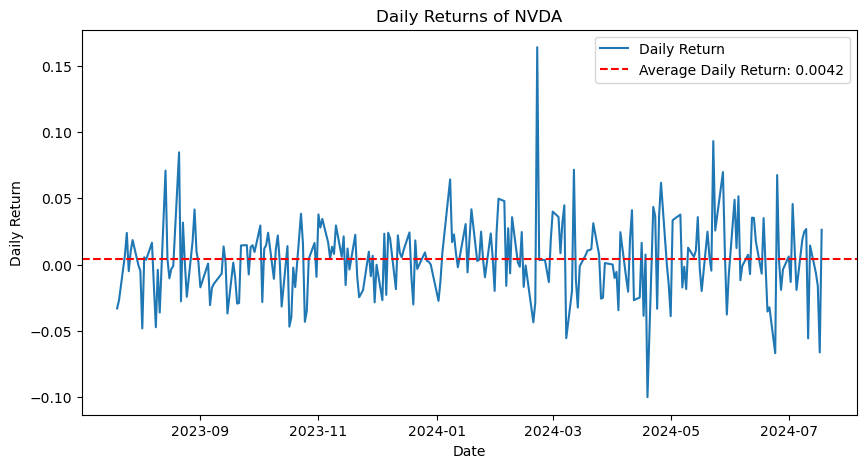

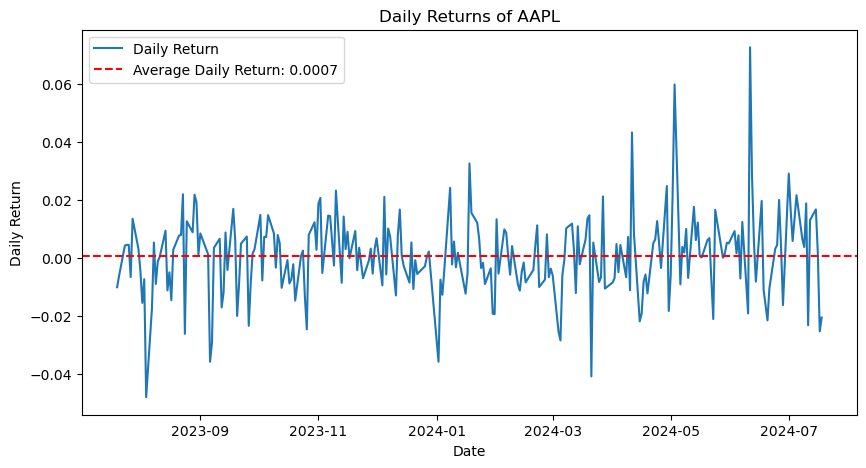

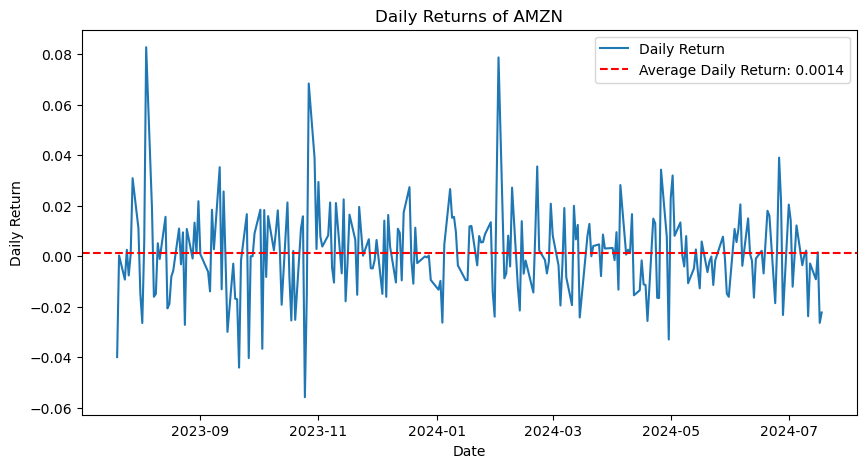

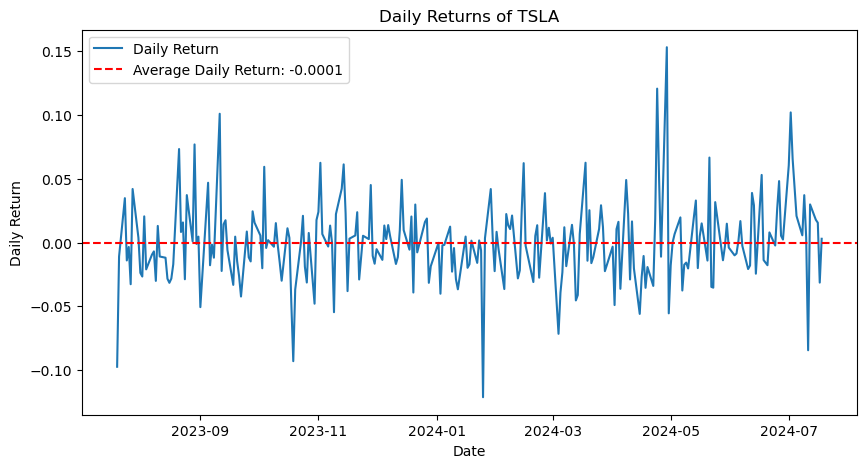

In [10]:
# Visualization of Daily Returns for Each Stock
for ticker in tickers:
    avg_daily_return = data[ticker]['Daily Return'].mean()

    plt.figure(figsize=(10, 5))
    plt.plot(data[ticker]['Daily Return'], label='Daily Return')
    plt.axhline(avg_daily_return, color='r', linestyle='--', label=f'Average Daily Return: {avg_daily_return:.4f}')
    plt.title(f'Daily Returns of {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.legend()
    plt.show()

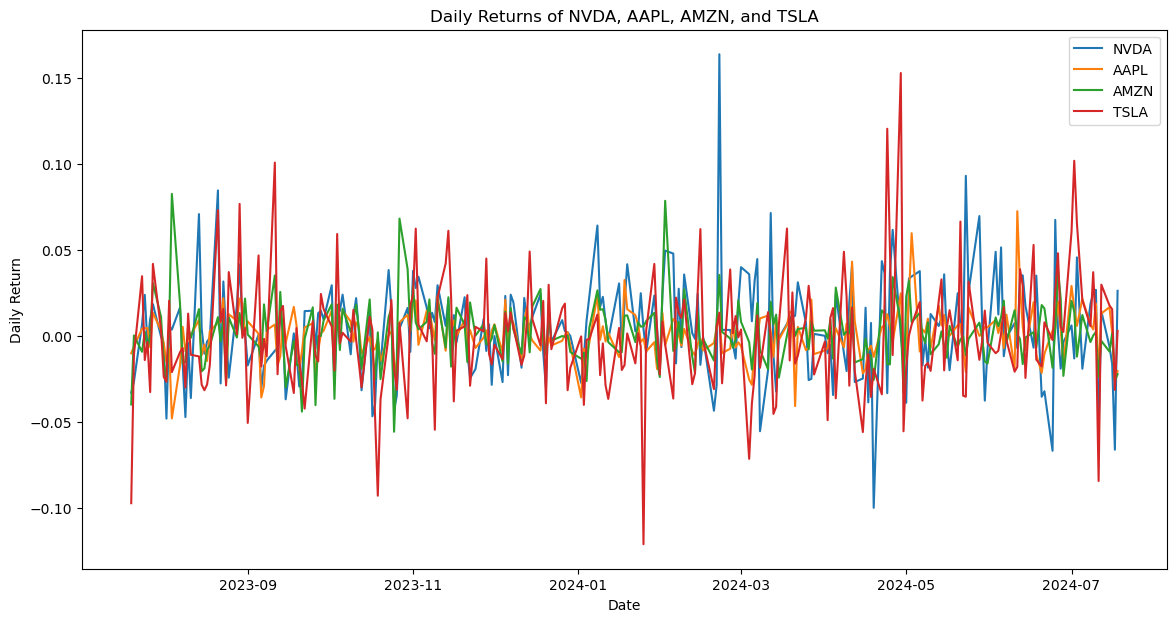

In [11]:
# Plot daily returns - Daily returns of all stocks shown in one graph, with messy, unuseful confusing visual.
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker]['Daily Return'], label=ticker)

plt.title('Daily Returns of NVDA, AAPL, AMZN, and TSLA')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


In [12]:
#Aggregation Analysis - This allows us to calculate summary statistics such as mean, standard deviation and percentiles for daily returns
# Summary statistics
summary_stats = {}
for ticker in tickers:
    summary_stats[ticker] = data[ticker]['Daily Return'].describe()

# Print summary statistics
for ticker, stats in summary_stats.items():
    print(f'Summary statistics for {ticker}:')
    print(stats)
    print()


Summary statistics for NVDA:
count    251.000000
mean       0.004186
std        0.029021
min       -0.100046
25%       -0.013151
50%        0.003707
75%        0.020525
max        0.164009
Name: Daily Return, dtype: float64

Summary statistics for AAPL:
count    251.000000
mean       0.000675
std        0.014230
min       -0.048020
25%       -0.007469
50%        0.001526
75%        0.007945
max        0.072649
Name: Daily Return, dtype: float64

Summary statistics for AMZN:
count    251.000000
mean       0.001371
std        0.017589
min       -0.055772
25%       -0.009415
50%        0.000318
75%        0.011112
max        0.082693
Name: Daily Return, dtype: float64

Summary statistics for TSLA:
count    251.000000
mean      -0.000083
std        0.033016
min       -0.121253
25%       -0.019518
50%       -0.000792
75%        0.015551
max        0.153069
Name: Daily Return, dtype: float64



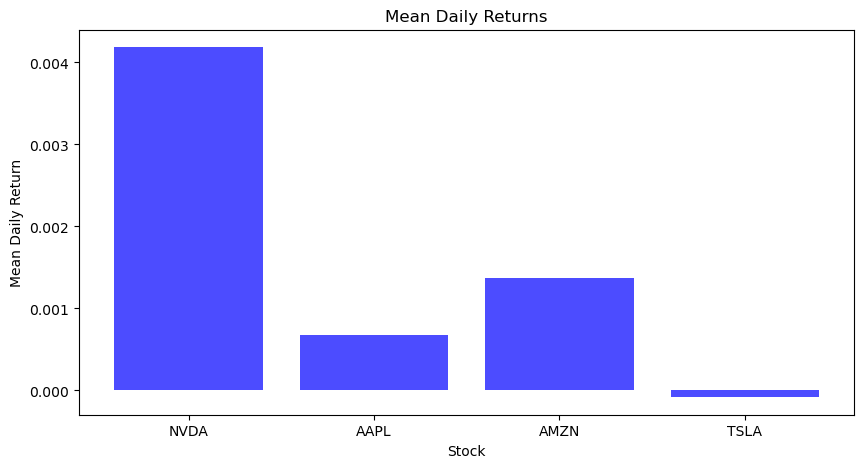

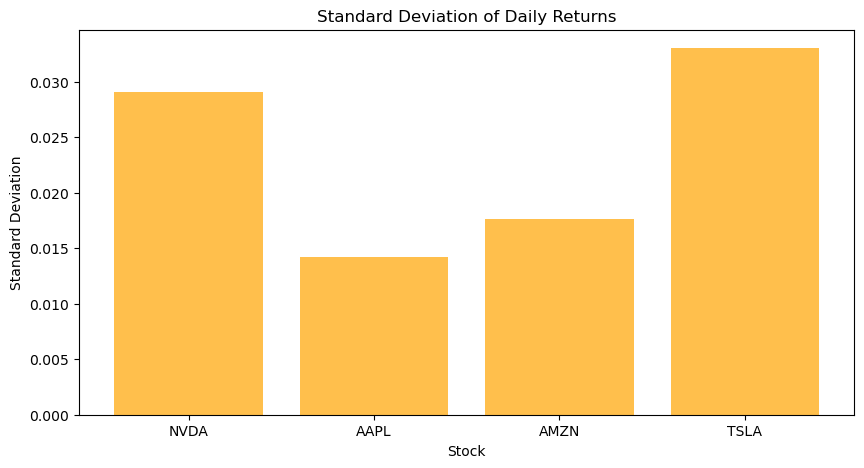

In [13]:
#Bar plot for Mean and Standard Deviation - to help understand the shape of distribution.
# Extracting mean and standard deviation for each stock
mean_returns = {ticker: data[ticker]['Daily Return'].mean() for ticker in tickers}
std_returns = {ticker: data[ticker]['Daily Return'].std() for ticker in tickers}

# Creating a bar plot for mean returns
plt.figure(figsize=(10, 5))
plt.bar(mean_returns.keys(), mean_returns.values(), color='blue', alpha=0.7)
plt.title('Mean Daily Returns')
plt.xlabel('Stock')
plt.ylabel('Mean Daily Return')
plt.show()

# Creating a bar plot for standard deviation of returns - which help measure variation or dispersion in a set of data.
plt.figure(figsize=(10, 5))
plt.bar(std_returns.keys(), std_returns.values(), color='orange', alpha=0.7)
plt.title('Standard Deviation of Daily Returns')
plt.xlabel('Stock')
plt.ylabel('Standard Deviation')
plt.show()

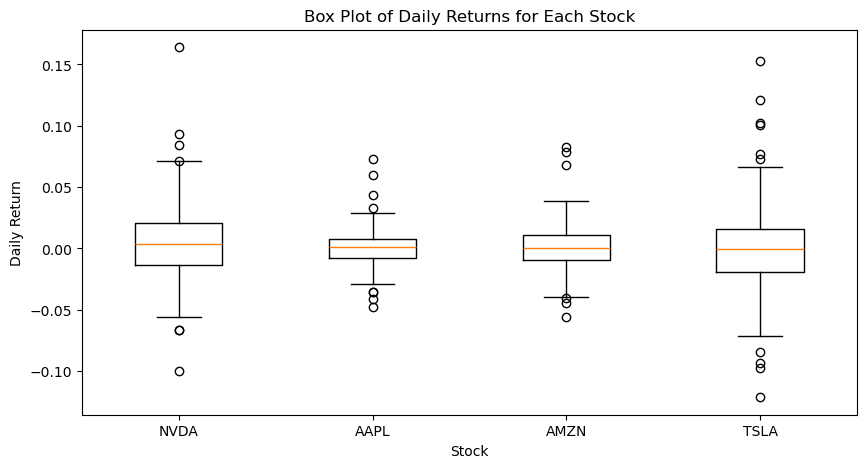

In [14]:
#Box Plot of Daily Returns to help give undestanding on best to least performing daily returns data.
plt.figure(figsize=(10, 5))
plt.boxplot([data[ticker]['Daily Return'].dropna() for ticker in tickers], labels=tickers)
plt.title('Box Plot of Daily Returns for Each Stock')
plt.xlabel('Stock')
plt.ylabel('Daily Return')
plt.show()

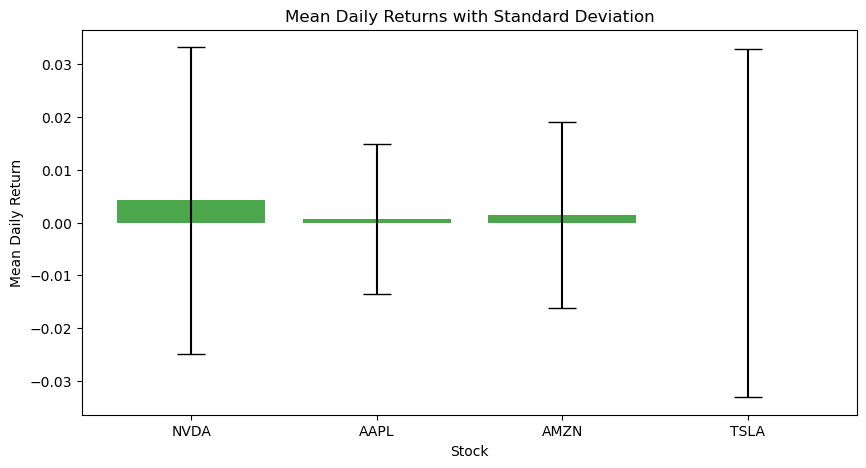

In [15]:
#Combined Visualizations of mean and Standard deviation

# Extracting mean and standard deviation for each stock
mean_returns = [data[ticker]['Daily Return'].mean() for ticker in tickers]
std_returns = [data[ticker]['Daily Return'].std() for ticker in tickers]

# Creating an error bar plot for mean returns with standard deviation
plt.figure(figsize=(10, 5))
x = np.arange(len(tickers))
plt.bar(x, mean_returns, yerr=std_returns, align='center', alpha=0.7, capsize=10, color='green')
plt.xticks(x, tickers)
plt.title('Mean Daily Returns with Standard Deviation')
plt.xlabel('Stock')
plt.ylabel('Mean Daily Return')
plt.show()

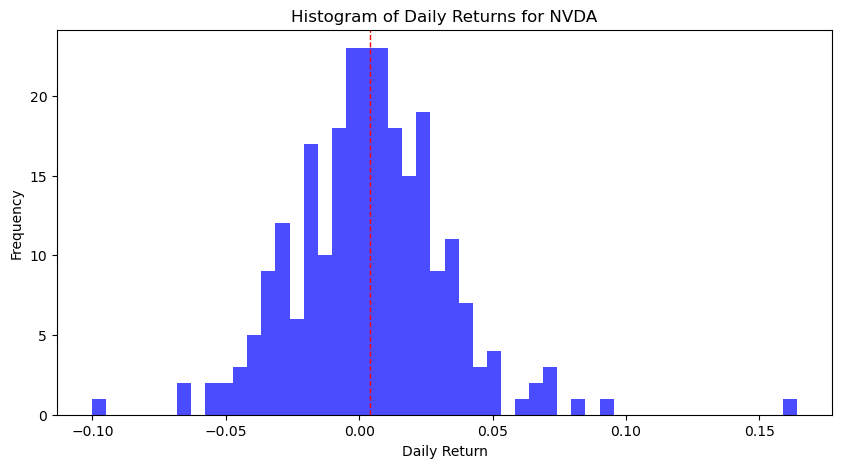

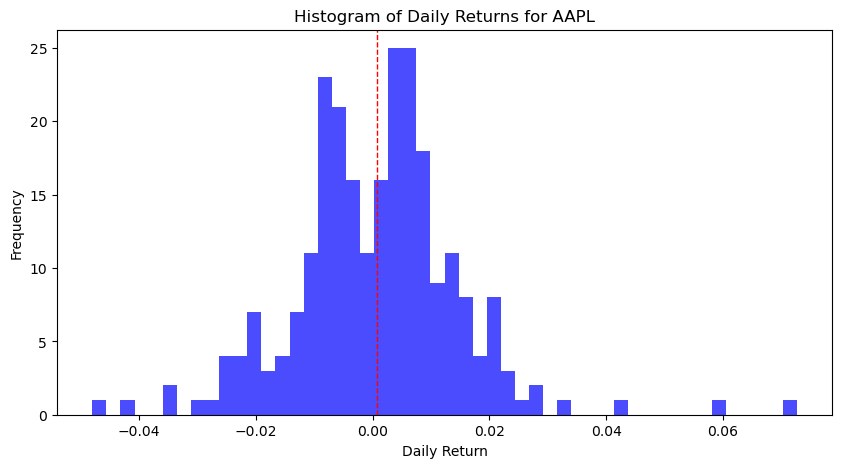

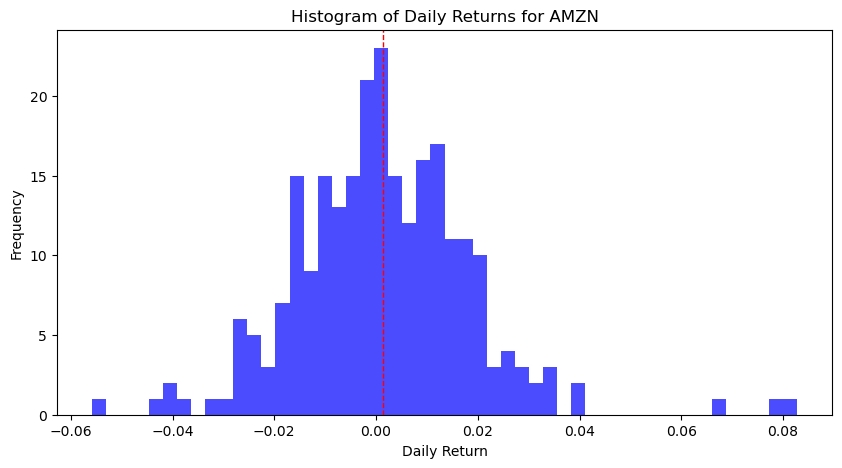

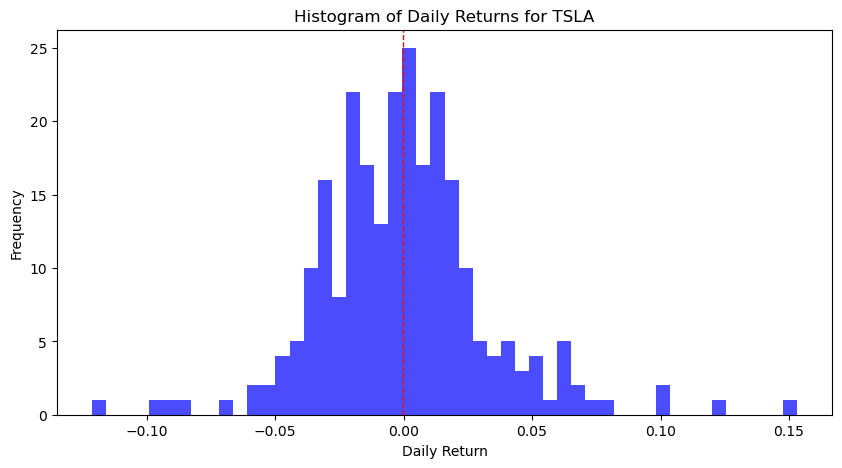

In [16]:
#Histograms of daily returns - A histogram helps one understand the distribution of daily returns for each stock.
for ticker in tickers:
    plt.figure(figsize=(10, 5))
    plt.hist(data[ticker]['Daily Return'].dropna(), bins=50, alpha=0.7, color='blue')
    plt.axvline(data[ticker]['Daily Return'].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.title(f'Histogram of Daily Returns for {ticker}')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()

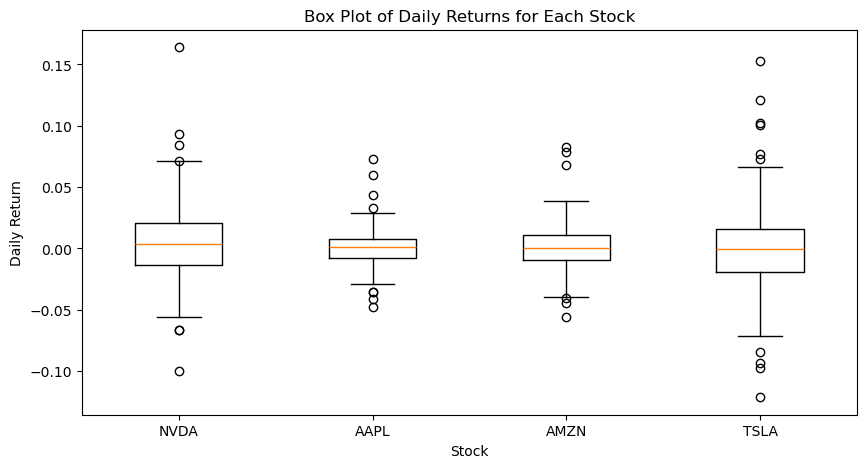

In [17]:
#Box plot of daily returns - A box plot can show the spread and outliers in daily returns.
plt.figure(figsize=(10, 5))
plt.boxplot([data[ticker]['Daily Return'].dropna() for ticker in tickers], labels=tickers)
plt.title('Box Plot of Daily Returns for Each Stock')
plt.xlabel('Stock')
plt.ylabel('Daily Return')
plt.show()

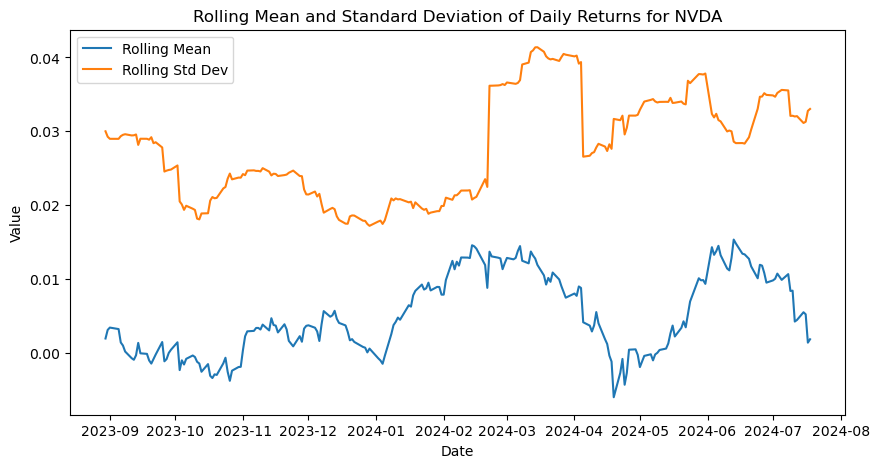

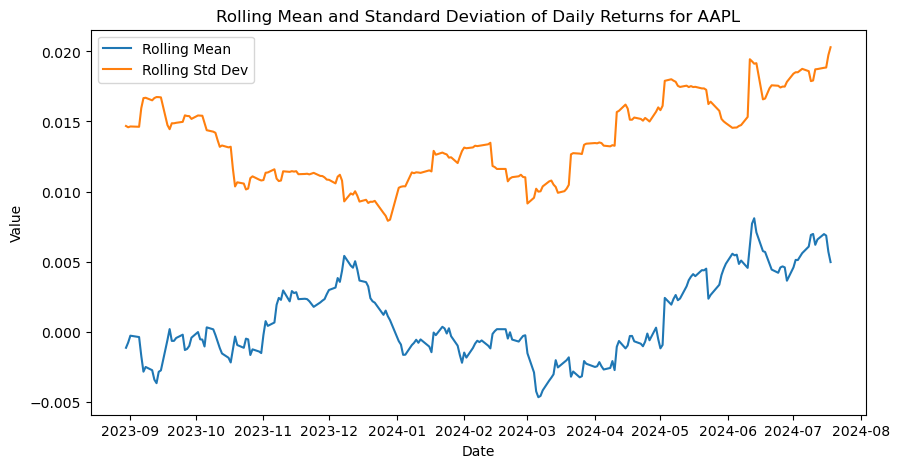

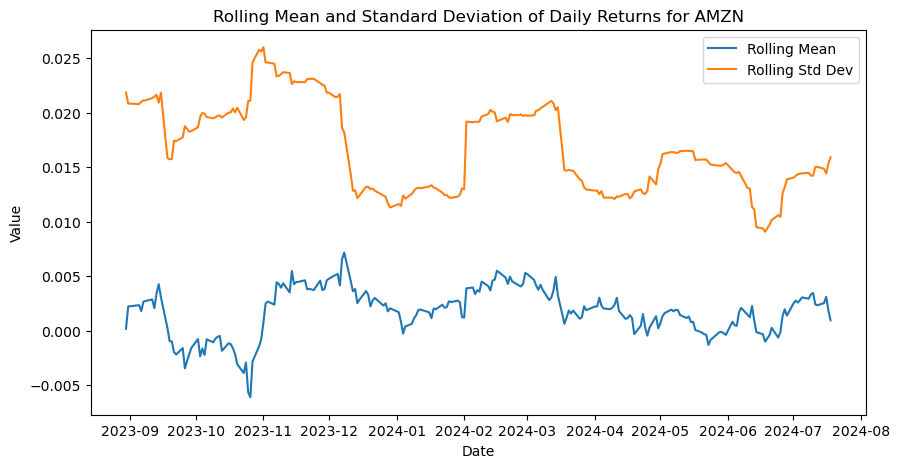

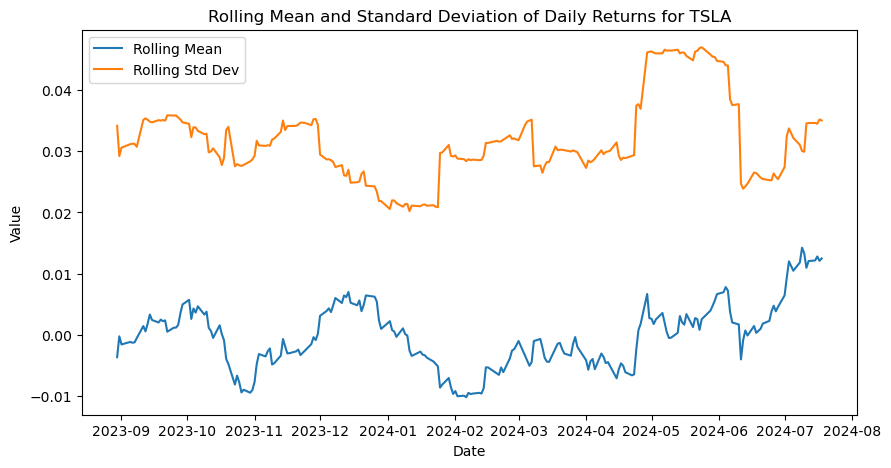

In [18]:
#Rolling Mean and Standard Deviation - Rolling statistics can help you understand the changing volatility and average returns over time.
window_size = 30  # 30-day rolling window

for ticker in tickers:
    plt.figure(figsize=(10, 5))
    rolling_mean = data[ticker]['Daily Return'].rolling(window=window_size).mean()
    rolling_std = data[ticker]['Daily Return'].rolling(window=window_size).std()

    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label='Rolling Std Dev')
    plt.title(f'Rolling Mean and Standard Deviation of Daily Returns for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

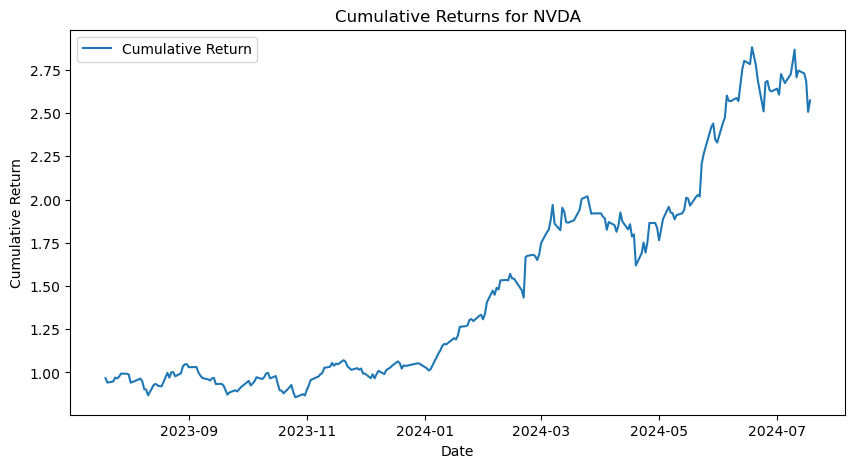

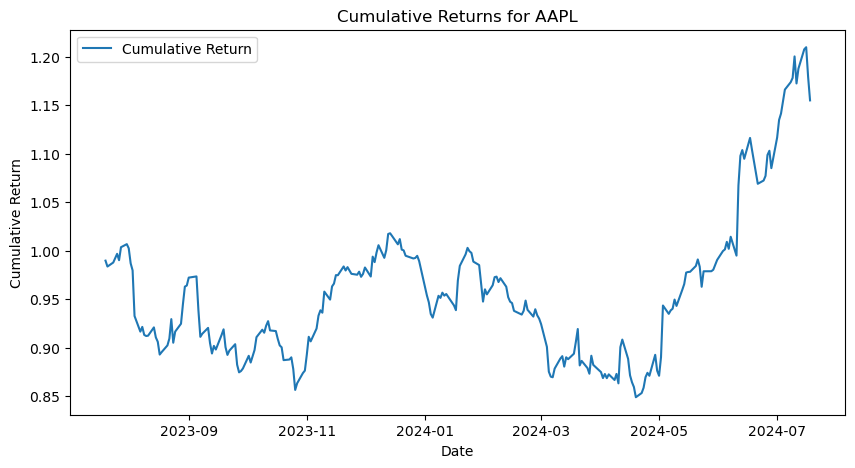

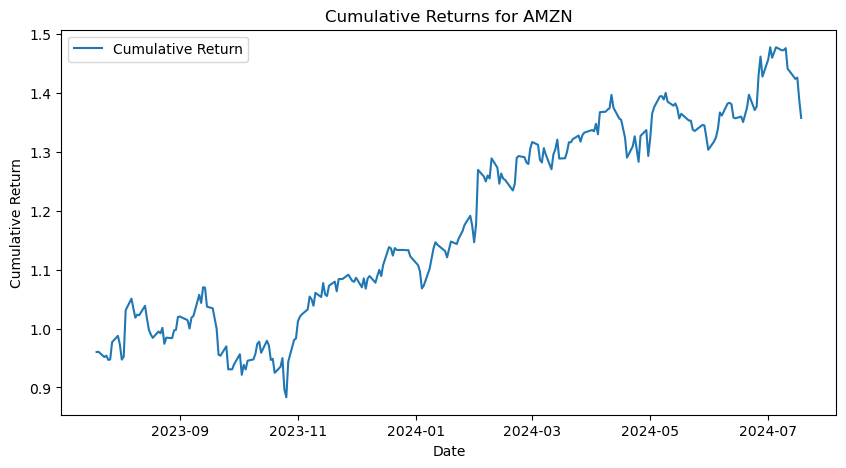

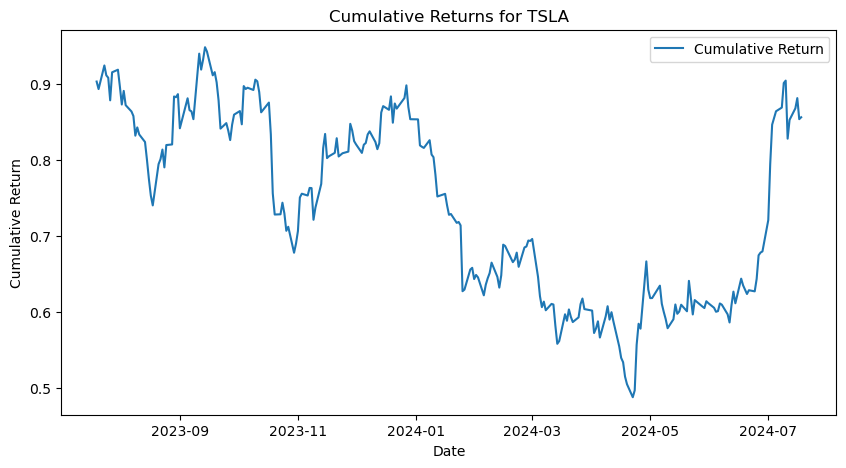

In [19]:
#Cumulative Returns - Cumulative returns show how the investment grows over time if you held the stock for the entire period.
for ticker in tickers:
    data[ticker]['Cumulative Return'] = (1 + data[ticker]['Daily Return']).cumprod()

    plt.figure(figsize=(10, 5))
    plt.plot(data[ticker]['Cumulative Return'], label='Cumulative Return')
    plt.title(f'Cumulative Returns for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.show()

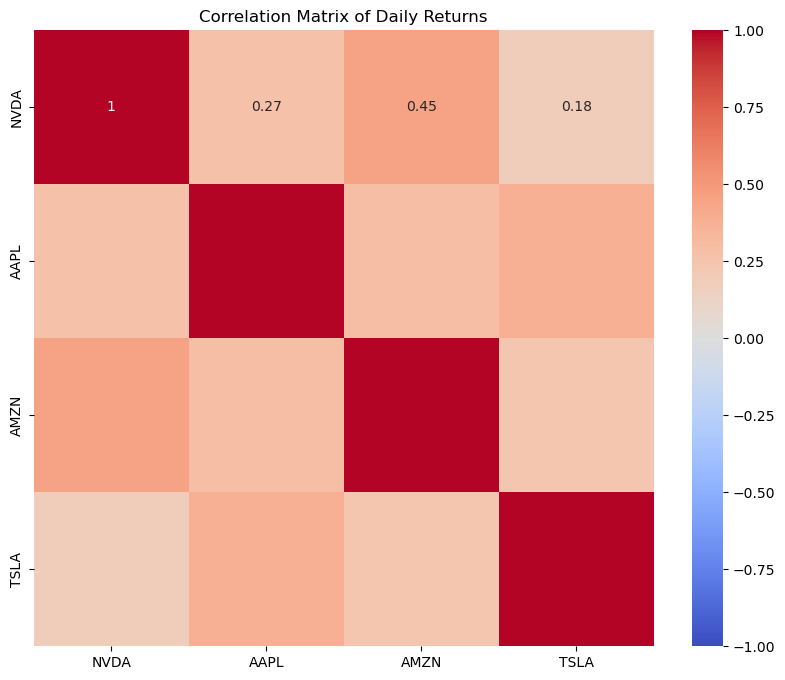

In [20]:
#Heatmap of daily returns correlation - A heatmap can visualize the correlation between the daily returns of multiple stocks.
# Combine daily returns into a single DataFrame
returns_df = pd.DataFrame({ticker: data[ticker]['Daily Return'] for ticker in tickers})

# Calculate the correlation matrix
correlation_matrix = returns_df.corr()

# Heatmap of the correlation matrix - A heatmap can visualize the correlation between the daily returns of multiple stocks.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Daily Returns')
plt.show()


In [21]:
#Correlation Analysis - This will help us calculate the correlation between the daily returns of each stock
# Combine daily returns into a single DataFrame
returns_df = pd.DataFrame({ticker: data[ticker]['Daily Return'] for ticker in tickers})

# Calculate the correlation matrix
correlation_matrix = returns_df.corr()

# Print the correlation matrix
print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
          NVDA      AAPL      AMZN      TSLA
NVDA  1.000000  0.270913  0.446847  0.178390
AAPL  0.270913  1.000000  0.290392  0.382232
AMZN  0.446847  0.290392  1.000000  0.240762
TSLA  0.178390  0.382232  0.240762  1.000000


In [22]:
#Comparison Statistical Analysis Techinque

In [23]:
# Calculate cumulative returns
for ticker in tickers:
    data[ticker]['Cumulative Return'] = (1 + data[ticker]['Daily Return']).cumprod()

# Display data for Nvidia to check
print(data['NVDA'].head())

                                Open       High        Low      Close  \
Date                                                                    
2023-07-19 00:00:00-04:00  47.449793  47.803687  46.728009  47.062908   
2023-07-20 00:00:00-04:00  46.493078  47.072907  45.048511  45.506374   
2023-07-21 00:00:00-04:00  45.774292  45.852271  44.086797  44.295734   
2023-07-24 00:00:00-04:00  44.717608  45.095497  44.026817  44.598644   
2023-07-25 00:00:00-04:00  44.927551  46.169176  44.909555  45.665329   

                              Volume  Dividends  Stock Splits  Daily Return  \
Date                                                                          
2023-07-19 00:00:00-04:00  427502000        0.0           0.0           NaN   
2023-07-20 00:00:00-04:00  537865000        0.0           0.0     -0.033073   
2023-07-21 00:00:00-04:00  963769000        0.0           0.0     -0.026604   
2023-07-24 00:00:00-04:00  382516000        0.0           0.0      0.006838   
2023-07-25 00:

In [24]:
# Calculate cumulative returns
for ticker in tickers:
    data[ticker]['Cumulative Return'] = (1 + data[ticker]['Daily Return']).cumprod()

# Display data for Apple to check
print(data['AAPL'].head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-07-19 00:00:00-04:00  192.079917  197.182806  191.632282  194.069351   
2023-07-20 00:00:00-04:00  194.059394  195.432109  191.483080  192.109756   
2023-07-21 00:00:00-04:00  193.074618  193.940017  190.219769  190.926025   
2023-07-24 00:00:00-04:00  192.388283  193.880359  191.234407  191.731766   
2023-07-25 00:00:00-04:00  192.308691  193.412828  191.900854  192.597153   

                             Volume  Dividends  Stock Splits  Daily Return  \
Date                                                                         
2023-07-19 00:00:00-04:00  80507300        0.0           0.0           NaN   
2023-07-20 00:00:00-04:00  59581200        0.0           0.0     -0.010097   
2023-07-21 00:00:00-04:00  71917800        0.0           0.0     -0.006162   
2023-07-24 00:00:00-04:00  45377800        0.0           0.0      0.00

In [25]:
# Calculate cumulative returns
for ticker in tickers:
    data[ticker]['Cumulative Return'] = (1 + data[ticker]['Daily Return']).cumprod()

# Display data for Amazon to check
print(data['AMZN'].head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-07-19 00:00:00-04:00  133.389999  135.990005  132.529999  135.360001   
2023-07-20 00:00:00-04:00  134.070007  134.789993  129.330002  129.960007   
2023-07-21 00:00:00-04:00  131.339996  131.369995  128.419998  130.000000   
2023-07-24 00:00:00-04:00  130.309998  131.660004  128.350006  128.800003   
2023-07-25 00:00:00-04:00  129.309998  129.580002  128.529999  129.130005   

                              Volume  Dividends  Stock Splits  Daily Return  \
Date                                                                          
2023-07-19 00:00:00-04:00   54531000        0.0           0.0           NaN   
2023-07-20 00:00:00-04:00   59820600        0.0           0.0     -0.039894   
2023-07-21 00:00:00-04:00  133265000        0.0           0.0      0.000308   
2023-07-24 00:00:00-04:00   45591100        0.0           0.0    

In [26]:
# Calculate cumulative returns
for ticker in tickers:
    data[ticker]['Cumulative Return'] = (1 + data[ticker]['Daily Return']).cumprod()

# Display data for Tesla to check
print(data['TSLA'].head())

                                 Open        High         Low       Close  \
Date                                                                        
2023-07-19 00:00:00-04:00  296.040009  299.290009  289.519989  291.260010   
2023-07-20 00:00:00-04:00  279.559998  280.929993  261.200012  262.899994   
2023-07-21 00:00:00-04:00  268.000000  268.000000  255.800003  260.019989   
2023-07-24 00:00:00-04:00  255.850006  269.850006  254.119995  269.059998   
2023-07-25 00:00:00-04:00  272.380005  272.899994  265.000000  265.279999   

                              Volume  Dividends  Stock Splits  Daily Return  \
Date                                                                          
2023-07-19 00:00:00-04:00  142355400        0.0           0.0           NaN   
2023-07-20 00:00:00-04:00  175158300        0.0           0.0     -0.097370   
2023-07-21 00:00:00-04:00  161050100        0.0           0.0     -0.010955   
2023-07-24 00:00:00-04:00  136508500        0.0           0.0    

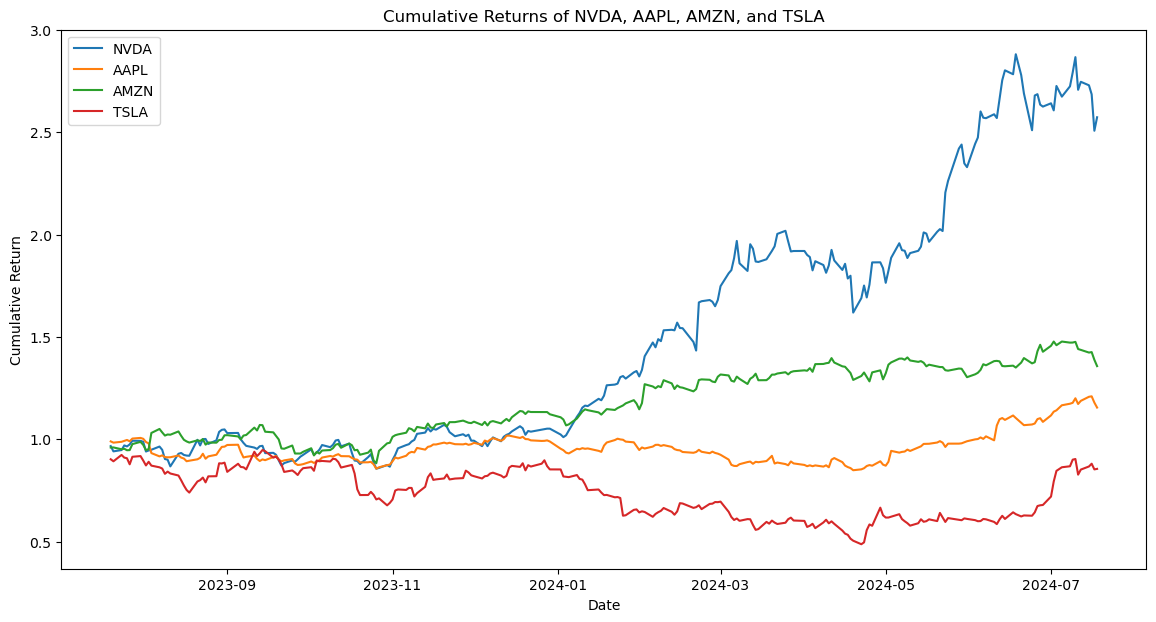

In [27]:
#Visualizing the cumuluative returns
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker]['Cumulative Return'], label=ticker)

plt.title('Cumulative Returns of NVDA, AAPL, AMZN, and TSLA')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

In [28]:
#Summary Statistics
# Summary statistics for cumulative returns
summary_stats_cumulative = {}
for ticker in tickers:
    summary_stats_cumulative[ticker] = data[ticker]['Cumulative Return'].describe()

# Print summary statistics
for ticker, stats in summary_stats_cumulative.items():
    print(f'Summary statistics for cumulative returns of {ticker}:')
    print(stats)
    print()

Summary statistics for cumulative returns of NVDA:
count    251.000000
mean       1.493862
std        0.604725
min        0.856667
25%        0.978363
50%        1.213262
75%        1.899960
max        2.880825
Name: Cumulative Return, dtype: float64

Summary statistics for cumulative returns of AAPL:
count    251.000000
mean       0.956199
std        0.074859
min        0.849060
25%        0.900713
50%        0.944996
75%        0.988639
max        1.209980
Name: Cumulative Return, dtype: float64

Summary statistics for cumulative returns of AMZN:
count    251.000000
mean       1.177107
std        0.166938
min        0.883348
25%        1.021868
50%        1.143469
75%        1.331191
max        1.477541
Name: Cumulative Return, dtype: float64

Summary statistics for cumulative returns of TSLA:
count    251.000000
mean       0.737812
std        0.120174
min        0.487709
25%        0.618005
50%        0.740060
75%        0.848263
max        0.947744
Name: Cumulative Return, dtype: f

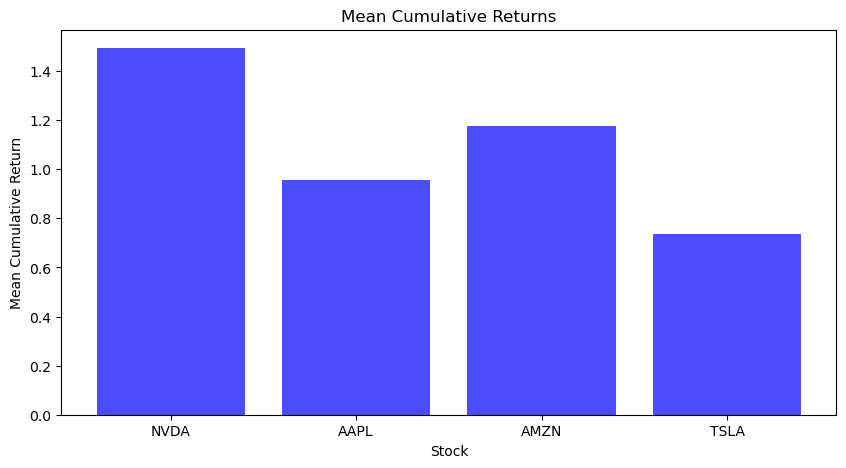

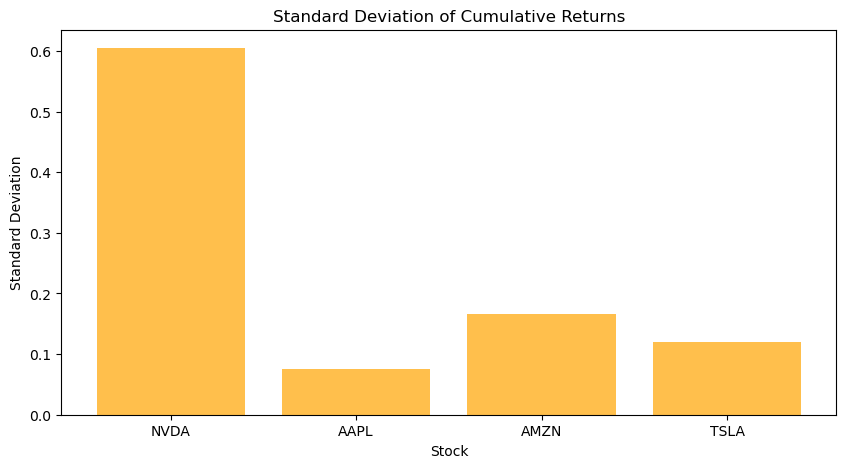

In [29]:
#Visualizations for summary Statistics
# Extracting mean and standard deviation for cumulative returns
mean_cumulative_returns = {ticker: data[ticker]['Cumulative Return'].mean() for ticker in tickers}
std_cumulative_returns = {ticker: data[ticker]['Cumulative Return'].std() for ticker in tickers}

# Creating a bar plot for mean cumulative returns
plt.figure(figsize=(10, 5))
plt.bar(mean_cumulative_returns.keys(), mean_cumulative_returns.values(), color='blue', alpha=0.7)
plt.title('Mean Cumulative Returns')
plt.xlabel('Stock')
plt.ylabel('Mean Cumulative Return')
plt.show()

# Creating a bar plot for standard deviation of cumulative returns
plt.figure(figsize=(10, 5))
plt.bar(std_cumulative_returns.keys(), std_cumulative_returns.values(), color='orange', alpha=0.7)
plt.title('Standard Deviation of Cumulative Returns')
plt.xlabel('Stock')
plt.ylabel('Standard Deviation')
plt.show()

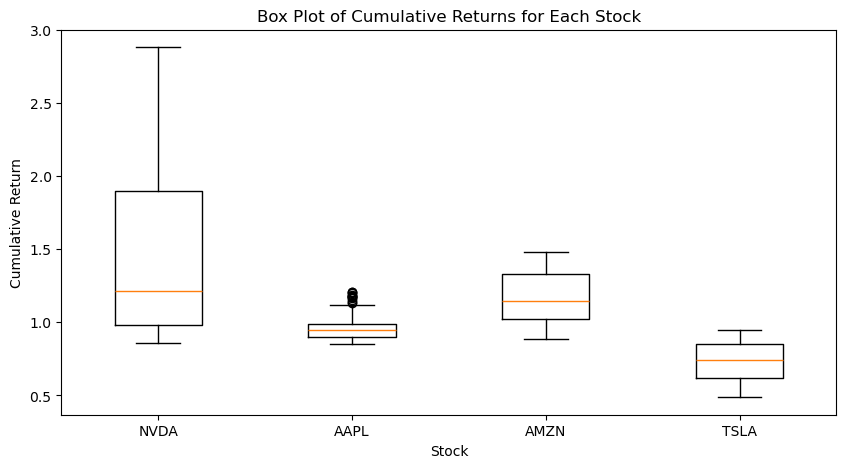

In [30]:
#Box plot Summary Visualization Statistics
plt.figure(figsize=(10, 5))
plt.boxplot([data[ticker]['Cumulative Return'].dropna() for ticker in tickers], labels=tickers)
plt.title('Box Plot of Cumulative Returns for Each Stock')
plt.xlabel('Stock')
plt.ylabel('Cumulative Return')
plt.show()


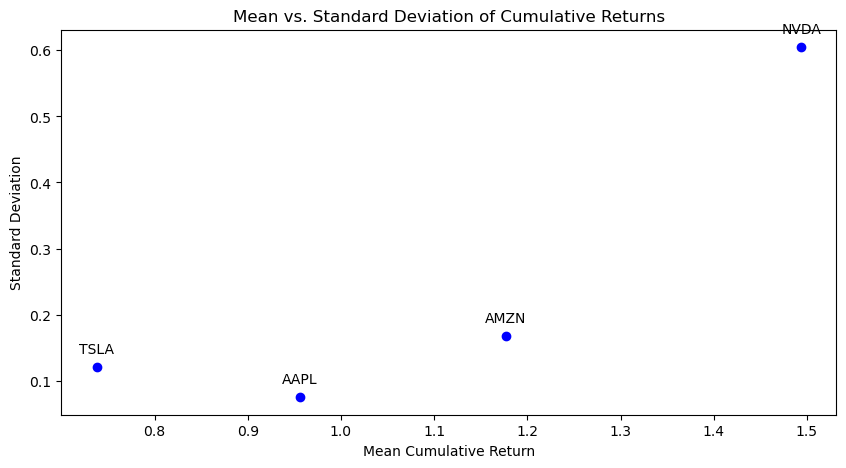

In [31]:
#Scatter Plot of Mean vs. Standard Deviation Summary Visualization
mean_cumulative_returns = {ticker: data[ticker]['Cumulative Return'].mean() for ticker in tickers}
std_cumulative_returns = {ticker: data[ticker]['Cumulative Return'].std() for ticker in tickers}

plt.figure(figsize=(10, 5))
plt.scatter(mean_cumulative_returns.values(), std_cumulative_returns.values(), color='blue')
for ticker in tickers:
    plt.annotate(ticker, (mean_cumulative_returns[ticker], std_cumulative_returns[ticker]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Mean vs. Standard Deviation of Cumulative Returns')
plt.xlabel('Mean Cumulative Return')
plt.ylabel('Standard Deviation')
plt.show()

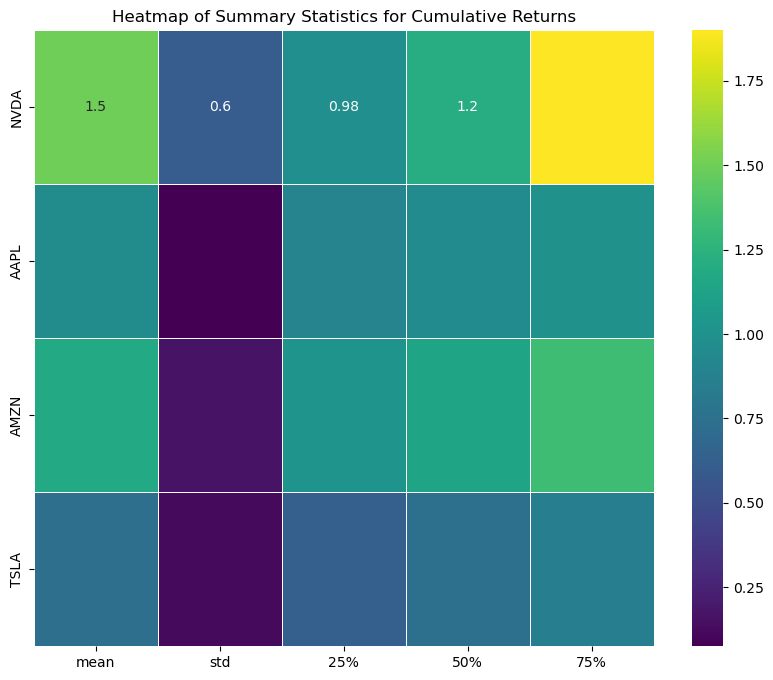

In [32]:
#5. Heatmap of Summary Statistics- heatmaps can visualize the summary statistics for each stock, showing mean, standard deviation, and other percentiles to help undestand the selected stocks in different contexts.
summary_stats_df = pd.DataFrame(summary_stats_cumulative).T

plt.figure(figsize=(10, 8))
sns.heatmap(summary_stats_df[['mean', 'std', '25%', '50%', '75%']], annot=True, cmap='viridis', linewidths=0.5)
plt.title('Heatmap of Summary Statistics for Cumulative Returns')
plt.show()

In [33]:
#The Following will help provide answers to research question 2 - What trends and volatility differences are there amongst the 4 stocks?

In [34]:
#Implementing Trends Analysis

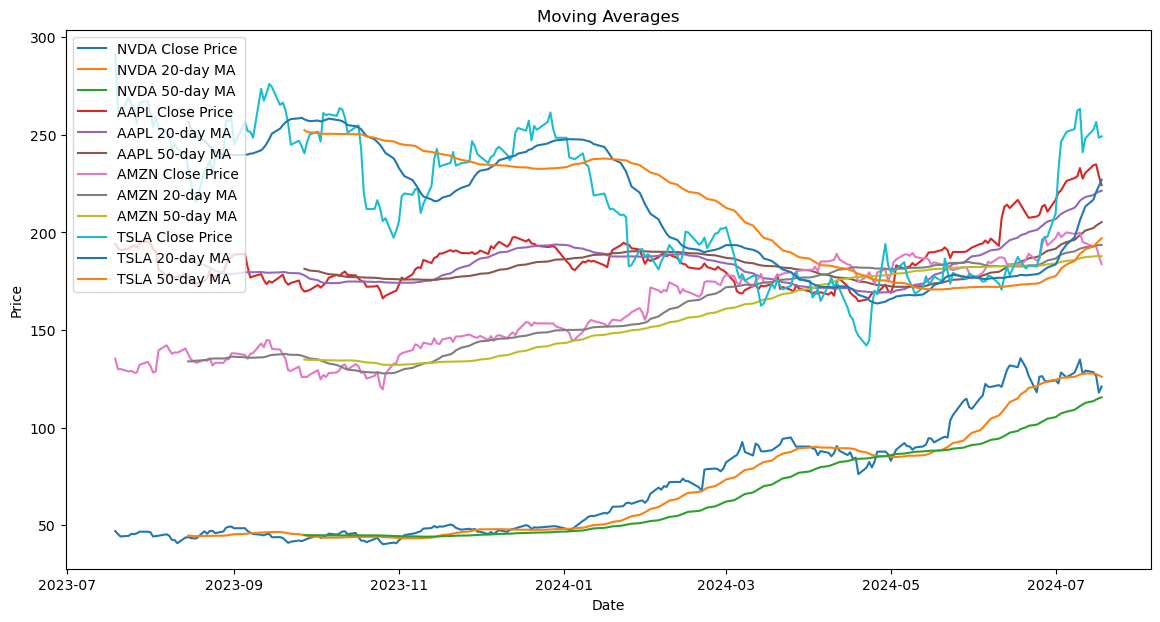

In [35]:
#Moving Averages Data
# Calculate moving averages
for ticker in tickers:
    data[ticker]['20-day MA'] = data[ticker]['Close'].rolling(window=20).mean()
    data[ticker]['50-day MA'] = data[ticker]['Close'].rolling(window=50).mean()

# Plot moving averages
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker]['Close'], label=f'{ticker} Close Price')
    plt.plot(data[ticker]['20-day MA'], label=f'{ticker} 20-day MA')
    plt.plot(data[ticker]['50-day MA'], label=f'{ticker} 50-day MA')

plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


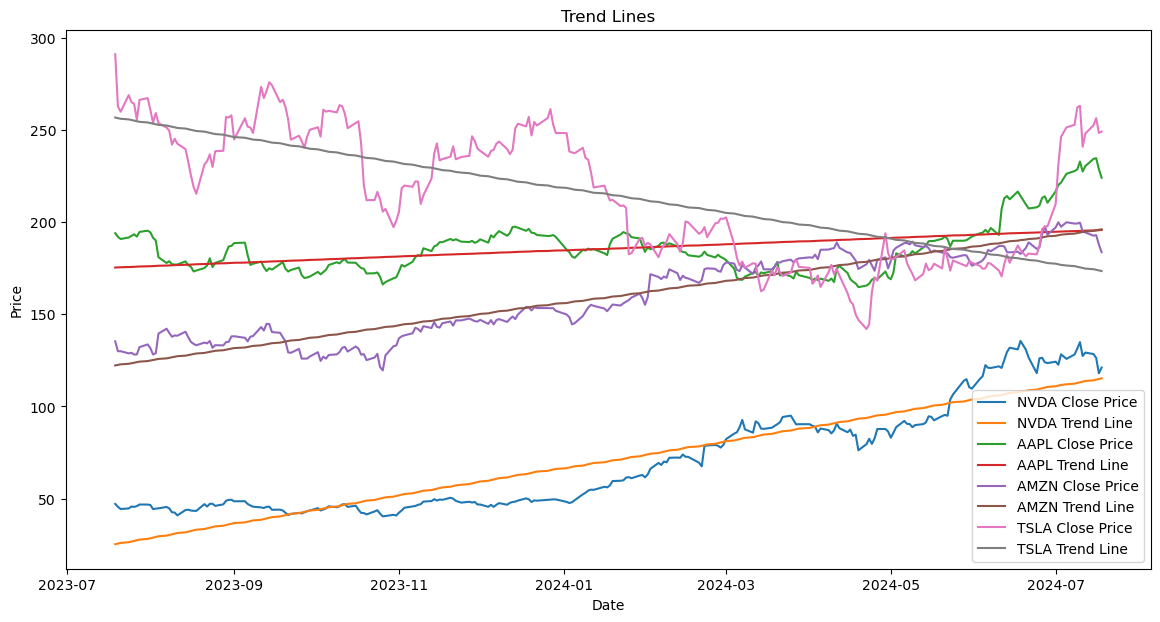

In [36]:
#Trend Lines Data - Plots trend lines to the closing prices - important for identifying patterns, forcasting future movements, decision making and strategy development, as well as risk management.

# Function to fit a trend line
def fit_trendline(data, col='Close'):
    x = np.arange(len(data))
    y = data[col].values
    z = np.polyfit(x, y, 1)
    trend = np.poly1d(z)
    return trend(x)

# Plot trend lines
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker]['Close'], label=f'{ticker} Close Price')
    trend = fit_trendline(data[ticker])
    plt.plot(data[ticker].index, trend, label=f'{ticker} Trend Line')

plt.title('Trend Lines')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
#Implementing Volatility Analysis

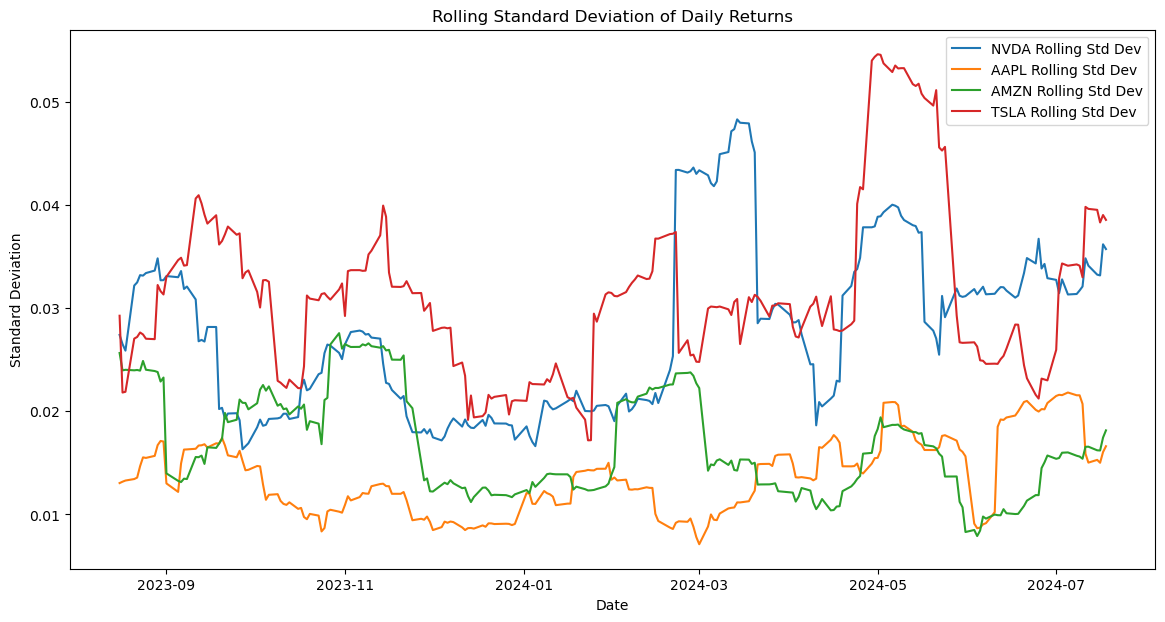

In [38]:
#Rolling Standard Deviations - Important measure in time series anaysis, to help understanding volatiliity, improving decision making, and enhancing forcasting of the market.
# Calculate rolling standard deviation
for ticker in tickers:
    data[ticker]['Rolling Std Dev'] = data[ticker]['Daily Return'].rolling(window=20).std()

# Plot rolling standard deviation
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker]['Rolling Std Dev'], label=f'{ticker} Rolling Std Dev')

plt.title('Rolling Standard Deviation of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

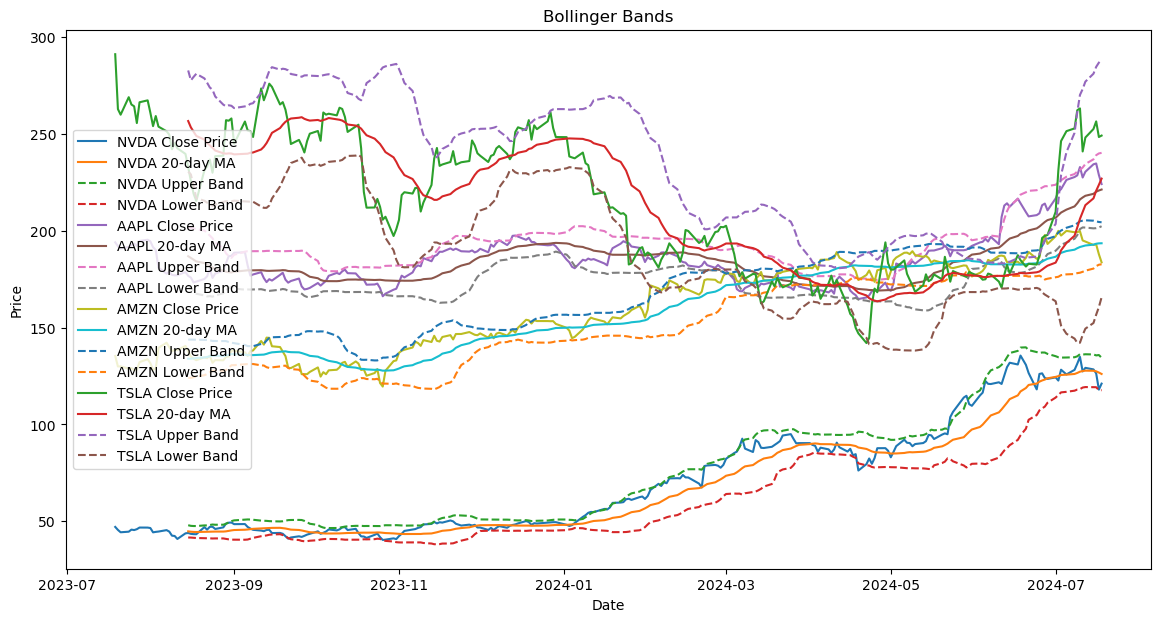

In [39]:
#Bollinger Bands - This visualization was used to help show market volatility and identifying overbought/oversold conditions.

# Calculate Bollinger Bands
for ticker in tickers:
    data[ticker]['20-day MA'] = data[ticker]['Close'].rolling(window=20).mean()
    data[ticker]['20-day Std Dev'] = data[ticker]['Close'].rolling(window=20).std()
    data[ticker]['Upper Band'] = data[ticker]['20-day MA'] + (data[ticker]['20-day Std Dev'] * 2)
    data[ticker]['Lower Band'] = data[ticker]['20-day MA'] - (data[ticker]['20-day Std Dev'] * 2)

# Plot Bollinger Bands
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data[ticker]['Close'], label=f'{ticker} Close Price')
    plt.plot(data[ticker]['20-day MA'], label=f'{ticker} 20-day MA')
    plt.plot(data[ticker]['Upper Band'], label=f'{ticker} Upper Band', linestyle='--')
    plt.plot(data[ticker]['Lower Band'], label=f'{ticker} Lower Band', linestyle='--')

plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()